# Walmart Sales Analysis using Python

## Importing libraries


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv('D:/Python/Walmart_Store_sales.csv')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
df.describe()


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [42]:
len(df.columns)

8

In [8]:
#missing values
miss_values=df.isna().sum().sort_values(ascending=False)
miss_values

Unemployment    0
CPI             0
Fuel_Price      0
Temperature     0
Holiday_Flag    0
Weekly_Sales    0
Date            0
Store           0
dtype: int64

In [9]:
df.Store.value_counts().head(10)

43    143
41    143
33    143
29    143
25    143
21    143
17    143
13    143
9     143
5     143
Name: Store, dtype: int64

In [13]:
df1 = df.groupby('Store')['Weekly_Sales'].sum().reset_index(name= 'sales').sort_values(by = 'sales', ascending = False).head(5)
df1

,Store,sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08
12,13,2.865177e+08
1,2,2.753824e+08


In [15]:
type(df1)
df1

,Store,sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08
12,13,2.865177e+08
1,2,2.753824e+08


In [16]:
df.Weekly_Sales.sort_values(ascending = False).reset_index(name = "max_sales").head(5)

,index,max_sales
0,1905,3818686.45
1,2763,3766687.43
2,1333,3749057.69
3,527,3676388.98
4,1762,3595903.20


In [92]:
#Store 20 has maximum weekly sales


In [17]:
df2 = df.groupby('Store').std()


In [18]:
df2.Weekly_Sales.sort_values(ascending = False).head(5)

Store
14    317569.949476
10    302262.062504
20    275900.562742
4     266201.442297
13    265506.995776
Name: Weekly_Sales, dtype: float64

In [ ]:
#Store 14 has maximum standard deviation.

### Converting Date field into date format

In [19]:
df['Date'] = pd.to_datetime(df['Date'])

In [20]:
type(df.Date)

pandas.core.series.Series

In [21]:
df['Year'] = df['Date'].dt.year

In [22]:
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [23]:
df['Quarter'] = df['Date'].dt.quarter

In [24]:
df3=df.groupby(['Year','Quarter']).sum()


In [25]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Quarter
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,28,3
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,5,10,2
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,12,10,4
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,19,4


### Sales Data for the year 2012

In [26]:

Sales_2012 = df[df['Year']== 2012]

In [27]:
Sales_2012

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Quarter
100,1,2012-06-01,1550369.92,0,49.01,3.157,219.714258,7.348,2012,6,1,2
101,1,2012-01-13,1459601.17,0,48.53,3.261,219.892526,7.348,2012,1,13,1
102,1,2012-01-20,1394393.84,0,54.11,3.268,219.985689,7.348,2012,1,20,1
103,1,2012-01-27,1319325.59,0,54.26,3.290,220.078852,7.348,2012,1,27,1
104,1,2012-03-02,1636339.65,0,56.55,3.360,220.172015,7.348,2012,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,28,3
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,5,10,2
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,12,10,4
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,19,4


### Quaterly_sales for the year 2012


In [28]:
sales_2012_by_quarter = Sales_2012.groupby(['Store','Quarter'])['Weekly_Sales'].sum().reset_index(name = 'Quaterly_sales')
sales_2012_by_quarter = pd.DataFrame(sales_2012_by_quarter)

In [226]:
sales_2012_by_quarter

,Store,Quarter,Quaterly_sales
0,1,1,18951097.69
1,1,2,21036965.58
2,1,3,18633209.98
3,1,4,9580784.77
4,2,1,22543946.63
...,...,...,...
175,44,4,2022983.83
176,45,1,9073434.67
177,45,2,10278900.05
178,45,3,8851242.32


## Calculating Growth Rate
### Growth rate = (present value - past value)/past value
### growth rate for Q2 sales = (Q2-Q1)/Q1


In [29]:


Q = sales_2012_by_quarter.pivot_table(index = 'Store',columns='Quarter',values='Quaterly_sales')

In [39]:
type(Q)
Q
Q['GR_Q2'] = (Q[2]-Q[1])*100/Q[1]


Quarter,1,2,3,4,GR_Q2
Store,,,,,
1,18951097.69,21036965.58,18633209.98,9580784.77,11.006581
2,22543946.63,25085123.61,22396867.61,11470757.52,11.272103
3,4957435.81,5562668.16,4966495.93,2537839.60,12.208577
4,25659307.85,28384185.16,25652119.35,13075576.88,10.619450
5,3912829.61,4427262.21,3880621.88,1948124.43,13.147329
6,18191088.24,20728970.16,18341221.11,9053767.49,13.951237
7,7216352.11,7613593.92,7322393.92,3215216.52,5.504745
8,10834016.00,11934275.61,10873860.34,5591768.18,10.155603
9,6623242.25,7431320.13,6528239.56,3391227.64,12.200639


In [50]:

Q2_growth = Q['GR_Q2'].sort_values(ascending = False).head(10)

Q2_growth

Store
17    24.959688
23    20.756851
15    19.463605
25    19.284288
26    19.118988
29    18.781093
41    18.606776
27    18.258961
40    18.130148
24    18.003066
Name: GR_Q2, dtype: float64

C:\Users\praka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'list' object has no attribute 'set_xlabel'

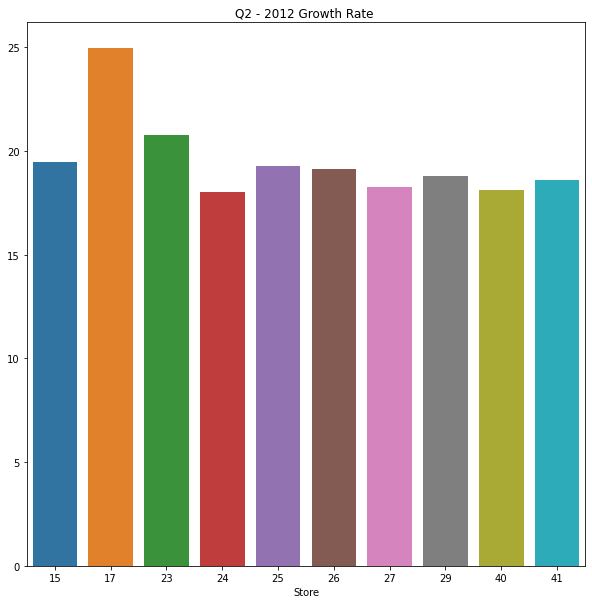

In [54]:
plt.figure(figsize=(10,10))
ax=sns.barplot(Q2_growth.index, Q2_growth.values,).set(title = "Q2 - 2012 Growth Rate ")
ax.set_xlabel("Store")
ax.set_ylabel("Growth Rate")


In [52]:
#Store 17 has maximum growth in Q2 of 2012.

In [55]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Quarter
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,28,3
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,5,10,2
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,12,10,4
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,19,4


### Holiday Sales

In [98]:
df3 = pd.read_csv('D:/Python/Walmart_Store_sales.csv')
df3 = df3[df3['Holiday_Flag']==1]

In [ ]:
#Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
#Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
#Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
#Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13


In [113]:
def holiday(x):
    if x['Date'] in  ['12-02-2010','11-02-2011','10-02-2012','08-02-2013']: return "Super Bowl Day"
    elif x['Date'] in  ['10-09-2010','09-09-2011','07-09-2012','06-09-2013']:  return "Labour Day"
    elif x['Date'] in  ['26-11-2010','25-11-2011','23-11-2012','29-11-2013']:  return "ThanksGiving Day"
    elif x['Date'] in  ['31-12-2010','30-12-2011','28-12-2012','27-12-2013']:  return "Christmas Day"
    else: return None
    
df3['Holiday_name'] = df3.apply(holiday, axis = 1)    
df3

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday_name
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,Super Bowl Day
31,1,10-09-2010,1507460.69,1,78.69,2.565,211.495190,7.787,Labour Day
42,1,26-11-2010,1955624.11,1,64.52,2.735,211.748433,7.838,ThanksGiving Day
47,1,31-12-2010,1367320.01,1,48.43,2.943,211.404932,7.838,Christmas Day
53,1,11-02-2011,1649614.93,1,36.39,3.022,212.936705,7.742,Super Bowl Day
...,...,...,...,...,...,...,...,...,...
6375,45,09-09-2011,746129.56,1,71.48,3.738,186.673738,8.625,Labour Day
6386,45,25-11-2011,1170672.94,1,48.71,3.492,188.350400,8.523,ThanksGiving Day
6391,45,30-12-2011,869403.63,1,37.79,3.389,189.062016,8.523,Christmas Day
6397,45,10-02-2012,803657.12,1,37.00,3.640,189.707605,8.424,Super Bowl Day


In [104]:

df1['Holiday_name'] = df3.apply(holiday, axis = 1)
df1

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Quarter,Holiday_name
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,4,Super Bowl Day
31,1,2010-10-09,1507460.69,1,78.69,2.565,211.495190,7.787,2010,10,9,4,Labour Day
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838,2010,11,26,4,ThanksGiving Day
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838,2010,12,31,4,None
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.936705,7.742,2011,11,2,4,Super Bowl Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6375,45,2011-09-09,746129.56,1,71.48,3.738,186.673738,8.625,2011,9,9,3,Labour Day
6386,45,2011-11-25,1170672.94,1,48.71,3.492,188.350400,8.523,2011,11,25,4,ThanksGiving Day
6391,45,2011-12-30,869403.63,1,37.79,3.389,189.062016,8.523,2011,12,30,4,None
6397,45,2012-10-02,803657.12,1,37.00,3.640,189.707605,8.424,2012,10,2,4,Super Bowl Day


In [114]:
#holiday week sales
Holiday_sales = df3['Holiday_name'].value_counts()
Holiday_sales

Labour Day          135
Super Bowl Day      135
Christmas Day        90
ThanksGiving Day     90
Name: Holiday_name, dtype: int64

C:\Users\praka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'list' object has no attribute 'set_xlabel'

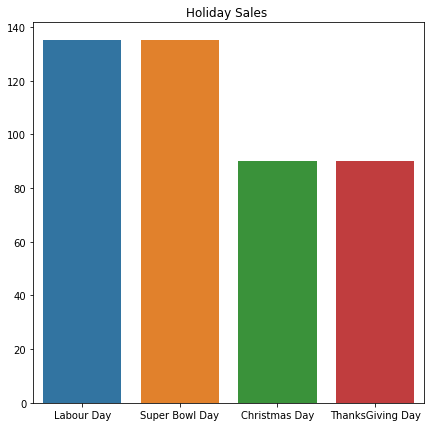

In [127]:
plt.figure(figsize=(7,7))
ax=sns.barplot(Holiday_sales.index, Holiday_sales.values,).set(title = "Holiday Sales ")
ax.set_xlabel("Holiday Name")
ax.set_ylabel("Count")

In [118]:
data = df3[['Holiday_name','Weekly_Sales']]

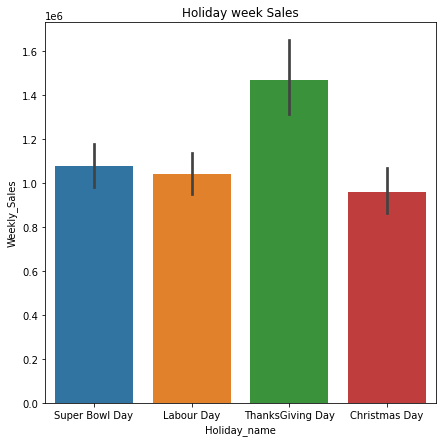

In [128]:
plt.figure(figsize=(7,7))
ax=sns.barplot(x= 'Holiday_name', y= 'Weekly_Sales',data= data).set(title = 'Holiday week Sales')

In [168]:
#Weekly_sales is maximum on 'ThanksGiving Day' 
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Quarter,Holiday_name
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,2,NaN
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,4,NaN
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,1,NaN
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,1,NaN
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,28,3,NaN
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,5,10,2,NaN
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,12,10,4,NaN
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,19,4,NaN


In [173]:
#Monthly sales


In [175]:
Monthly_sales = df1.groupby('Month')['Weekly_Sales'].sum().reset_index(name= 'sales').sort_values(by = 'sales', ascending = False).head()

In [176]:
Monthly_sales

,Month,sales
3,11,1.797508e+08
4,12,1.348117e+08
2,10,9.564381e+07
0,7,4.833006e+07
1,9,4.676323e+07


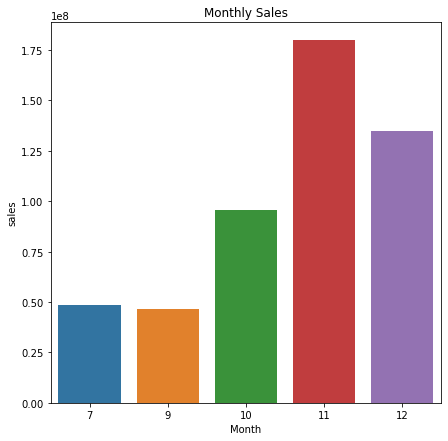

In [149]:
plt.figure(figsize=(7,7))
ax=sns.barplot(x= 'Month', y= 'sales',data= Monthly_sales).set(title = 'Monthly Sales')

In [3]:
#Non Holiday sales data
Non_holiday = df[df['Holiday_Flag']==0]
Non_holiday

NameError: name 'df' is not defined

In [186]:
Non_holiday['NH_mean'] =Non_holiday.groupby('Store')['Weekly_Sales'].mean()
Non_holiday['NH_mean']

<ipython-input-186-433852d504f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Non_holiday['NH_mean'] =Non_holiday.groupby('Store')['Weekly_Sales'].mean()


0                NaN
2       1.914209e+06
3       4.000648e+05
4       2.083556e+06
5       3.148923e+05
            ...     
6430             NaN
6431             NaN
6432             NaN
6433             NaN
6434             NaN
Name: NH_mean, Length: 5985, dtype: float64

### Non holiday sales mean

In [2]:

Non_holidayMean = Non_holiday.groupby("Store")["Weekly_Sales"].mean().reset_index(name="Average Sale").sort_values(by='Average Sale', ascending=False)

NameError: name 'Non_holiday' is not defined

In [1]:
Non_holidayMean['Average Sale'] = Non_holidayMean['Average Sale'].round(3)


NameError: name 'Non_holidayMean' is not defined

In [256]:
store1.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day', 'Quarter',
       'Holiday_name'],
      dtype='object')

In [259]:
#Store 1 data - Prediction model to forecast demand

store1 = df[df['Store']==1]
store1= store1.drop(['Store','Year', 'Month', 'Day', 'Quarter',
       'Holiday_name'],axis =1)
store1.shape
store1.columns


Index(['Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment'],
      dtype='object')

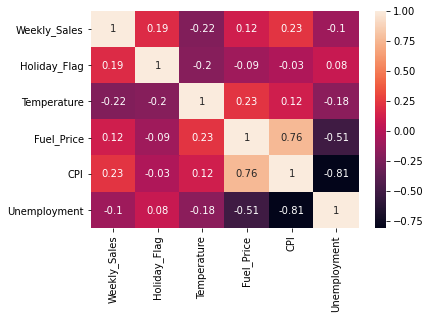

In [260]:
ax = sns.heatmap(store1.corr().round(2), annot = True)

In [262]:
#features and target
x = store1.drop(['Weekly_Sales','Date'], axis = 1)
y = store1[['Weekly_Sales']]


In [263]:
#Building linear regression model
#training
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = .8, random_state = 10)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(114, 5)
(29, 5)
(114, 1)
(29, 1)


In [234]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()


In [240]:
lreg.fit(x_train, y_train )

LinearRegression()

In [242]:
lreg.coef_

array([[     0.        , 135850.84164655,  -1889.24047235,
         27235.87008292,   6718.96194806,  15940.57309021]])

In [243]:
lreg.intercept_

array([13237.88674217])

In [247]:
y_pred = lreg.predict(x_test)

In [248]:
# Mean_Square_Error
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
MSE

20263001008.35115

In [249]:
#Root Mean square Error
np.sqrt(MSE)

142348.16826482577